In [1]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import PIL.Image
import numpy as np
import dask.bag
from dask.diagnostics import ProgressBar
import pandas as pd
import random
import cv2

In [2]:
data_dir = pathlib.Path(r"C:\Users\lenovo\Downloads\Image Data base\Image Data base")
class_name = os.listdir(data_dir)

In [3]:
print(f"Total number of plant species: {len(class_name)}")
class_name

Total number of plant species: 58


['algal leaf in tea',
 'anthracnose in tea',
 'Apple Apple scab',
 'Apple Black rot',
 'Apple Cedar apple rust',
 'Apple healthy',
 'Bacterial leaf blight in rice leaf',
 'bird eye spot in tea',
 'Blight in corn Leaf',
 'Blueberry healthy',
 'brown blight in tea',
 'Brown spot in rice leaf',
 'cabbage looper',
 'Cercospora leaf spot',
 'Cherry (including sour) Powdery mildew',
 'Cherry (including_sour) healthy',
 'Common Rust in corn Leaf',
 'Corn (maize) healthy',
 'corn crop',
 'Garlic',
 'ginger',
 'Grape Black rot',
 'Grape Esca Black Measles',
 'Grape healthy',
 'Grape Leaf blight Isariopsis Leaf Spot',
 'Gray Leaf Spot in corn Leaf',
 'healthy tea leaf',
 'Leaf smut in rice leaf',
 'lemon canker',
 'Nitrogen deficiency in plant',
 'onion',
 'Orange Haunglongbing Citrus greening',
 'Peach healthy',
 'Pepper bell Bacterial spot',
 'Pepper bell healthy',
 'potassium deficiency in plant',
 'potato crop',
 'Potato Early blight',
 'Potato healthy',
 'potato hollow heart',
 'Potato Late

In [4]:
EPOCHS = 20
SAMPLE_LEN = 100
IMAGE_PATH = r"C:\Users\lenovo\Downloads\Image Data base\Image Data base\algal leaf in tea"
TEST_PATH = r"C:\Users\lenovo\Downloads\Image Data base\test.csv"
TRAIN_PATH = r"C:\Users\lenovo\Downloads\Image Data base\train.csv"
SUB_PATH = r"C:\Users\lenovo\Downloads\Image Data base\sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [5]:
EPOCHS = 4
SAMPLE_LEN = 20
IMAGE_PATH = r"C:\Users\lenovo\Downloads\Image Data base\Image Data base\algal leaf in tea"
TEST_PATH = r"C:\Users\lenovo\Downloads\Image Data base\test.csv"
TRAIN_PATH = r"C:\Users\lenovo\Downloads\Image Data base\train.csv"
SUB_PATH = r"C:\Users\lenovo\Downloads\Image Data base\sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [6]:
train_data = pd.DataFrame(pd.read_csv(r"C:\Users\lenovo\Downloads\Image Data base\train.csv"))
test_data = pd.DataFrame(pd.read_csv(r"C:\Users\lenovo\Downloads\Image Data base\test.csv"))

In [7]:
print("Training data shape : = {}".format(train_data.shape))
print("Test data shape : = {}".format(test_data.shape))

Training data shape : = (20, 5)
Test data shape : = (20, 1)


In [8]:
train_data.head()

,image_id,healthy,rust,diseased,scab
0,algal_leaf_in_tea1,0,0,1,0
1,algal_leaf_in_tea2,1,0,0,0
2,algal_leaf_in_tea3,0,1,0,0
3,algal_leaf_in_tea4,0,0,1,0
4,algal_leaf_in_tea5,0,0,1,0


In [9]:
arr = train_data["image_id"]
train_images = [i for i in arr]  

arr = test_data["image_id"]
test_images = [i for i in arr]

In [10]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
def load_image(image_id) : 
  image_path = image_folder_path +image_id +".jpg"
  image = cv2.imread(image_path) 
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image

def resize(image, image_size):
  image = cv2.resize(image, (image_size[0], image_size[1]), interpolation = cv2.INTER_AREA)
  return image

In [12]:
def extract_classes(s):
  """
  s can be either of the four classes mentioned above.
  """ 
  t = train_data[train_data[s] == 1] 
  arr = t["image_id"]
  images = [i for i in tqdm(arr)]
  train_images = [load_image(i) for i in tqdm(images)]
  return train_images

classes = ["healthy", "multiple_diseases", "rust", "scab"]

In [13]:
count_healthy = len(train_data[train_data["healthy"] == 1])
count_diseased = len(train_data[train_data["diseased"] == 1])
count_rust = len(train_data[train_data["rust"] == 1])
count_scab = len(train_data[train_data["scab"] == 1])

print(count_healthy)
print(count_diseased)
print(count_rust)
print(count_scab)
print(count_healthy + count_diseased + count_rust +  count_scab)

1
12
4
3
20


(-1.1579662220564508,
 1.1551412849124292,
 -1.1333279693676745,
 1.1533231020771213)

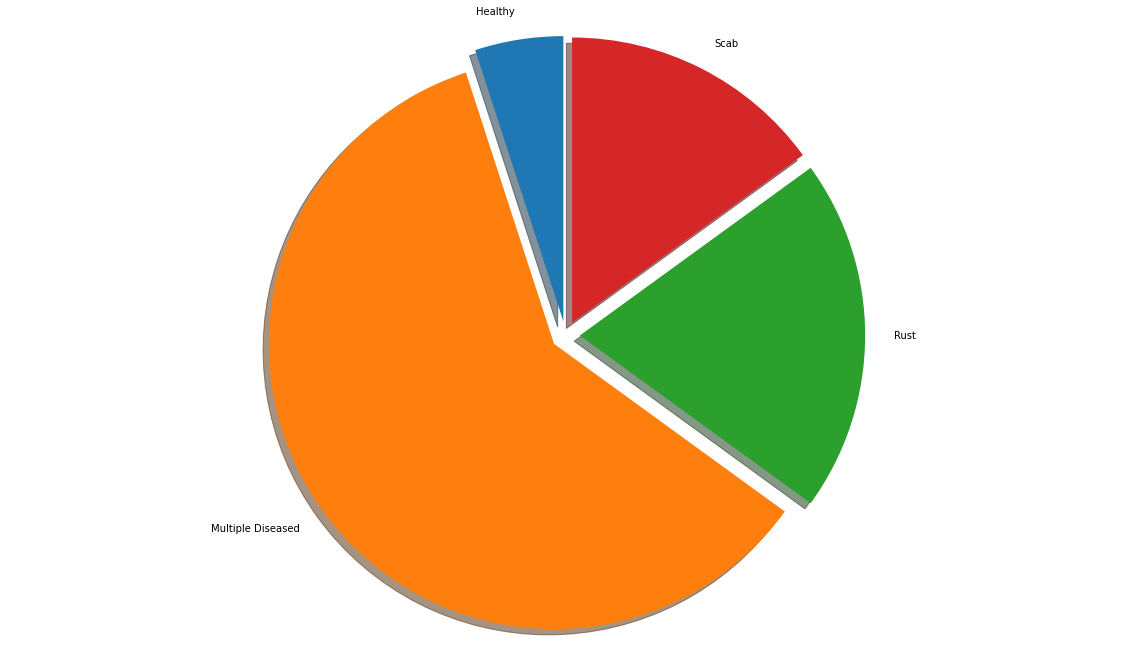

In [14]:
labels = ["Healthy", "Multiple Diseased", "Rust", "Scab"]
counts = [count_healthy, count_diseased, count_rust, count_scab]
explode = (0.05, 0.05, 0.05, 0.05)
fig, ax = plt.subplots(figsize = (20, 12))
ax.pie(counts, explode = explode, labels = labels, shadow = True, startangle = 90)
ax.axis("equal") 